In [3267]:
from IPython.display import Image, display, Math
import sympy as sy
import math
import matplotlib.pyplot as plt
from numpy import *
import sympy.physics.mechanics as me
import pandas as pd

DESAFIO 1:
Realizar a apresentação do dimensionamento do eixo que será apresentado. Levar em consideração aspectos como: material, fator de segurança escolhido, diâmetro e dimensionamento a fadiga.

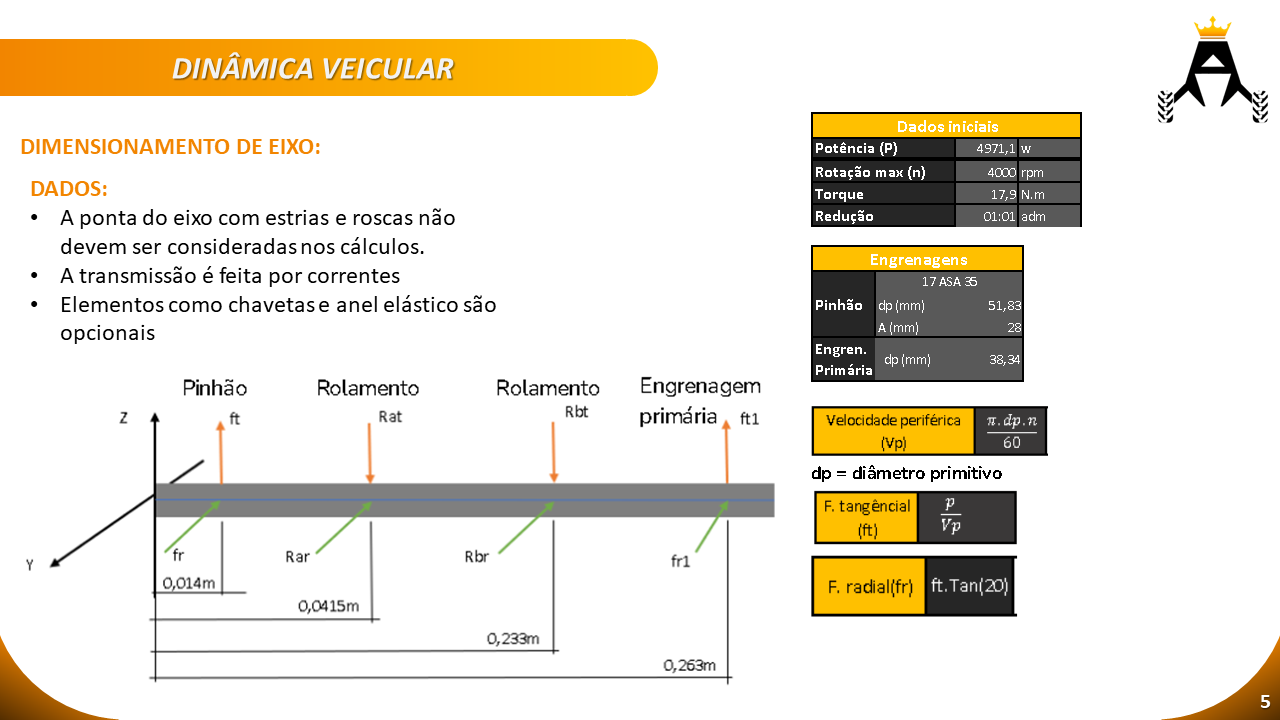

In [3268]:
Image("Desafio 1.png")

In [3269]:
'''Dados Iniciais'''
P = 4971.1 #W
n_rpm = 4000   #rpm
T = 17.9   #Nm
redução = 1

A primeira etapa foi calcular as forças tangenciais e forças radias presentes:

In [3270]:
'''Engrenagens'''

# Pinhão
dp_pinhao = 51.83 * 10 ** -3 # m
A_pinhao = 28 * 10 ** -3 #m

# Engrenagem Primária
dp_primaria = 38.34 * 10 ** -3 # m

In [3271]:
'''Forças no Pinhão'''

Vp_pinhao = (pi * dp_pinhao * n_rpm) / 60
ft = P / Vp_pinhao
fr = ft*tan(math.radians(20))
display(Math(f'f_t = {ft:.2f} N'))
display(Math(f'f_r = {fr:.2f} N'))
ft_fr_pos = 0.014

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3272]:
'''Forças na Engrenagem Primária'''

Vp_primaria = (pi * dp_primaria * n_rpm) / 60
ft1 = P / Vp_primaria
fr1 = ft1*tan(math.radians(20))
display(Math('f_{t1} = %s N'%round(ft1,2)))
display(Math('f_{r1} = %s N'%round(fr1,2)))
ft1_fr1_pos = 0.263

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---

Para determinar a seção crítica por meio dos Diagramas de Esforço Cortante e Momento Fletor, utilizou-se a ferramenta Viga Online devido a sua simplicidade.

$$\text{Plano} \ XZ$$

In [3273]:
# Reações de Apoio
Rat = 426.7194 # N
Rbt = 650.2906 # N

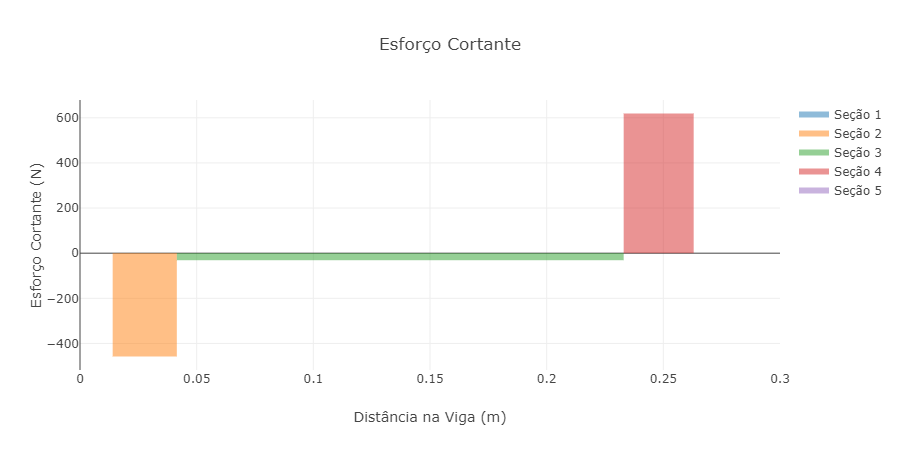

In [3274]:
Image('Esforço_Cortante_XZ.png')

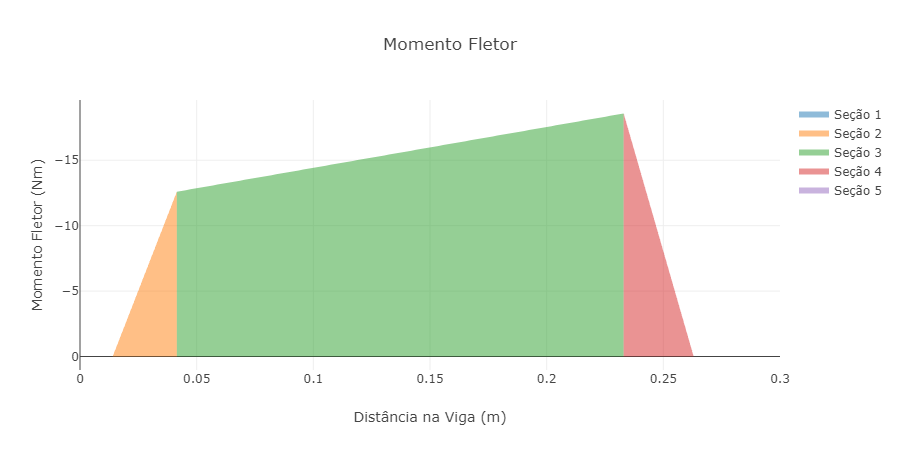

In [3275]:
Image('Momento_Fletor_XZ.png')

In [3276]:
V_xz = 619.07 # N
M_xz = -18.5721 # Nm

$$\text{Plano} \ XY$$

In [3277]:
# Reações de Apoio
Rar = 155.3176 # N
Rbr = 236.6824 # N 

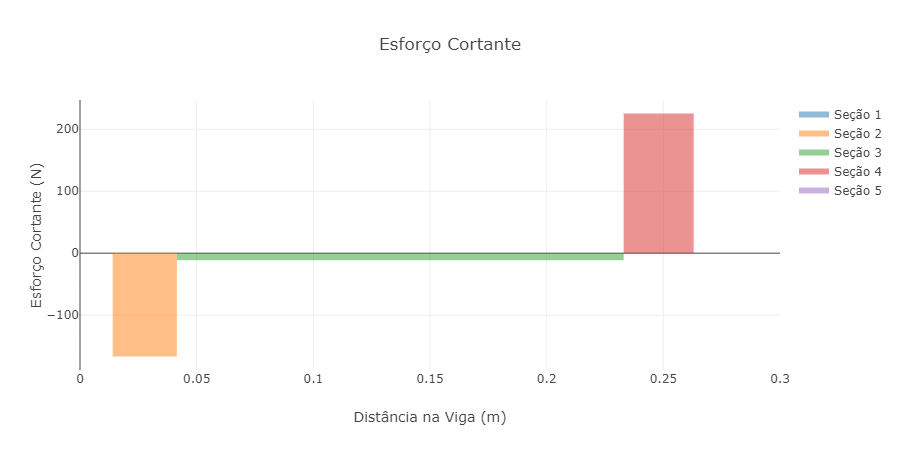

In [3278]:
Image('Esforço_Cortante_XY.png')

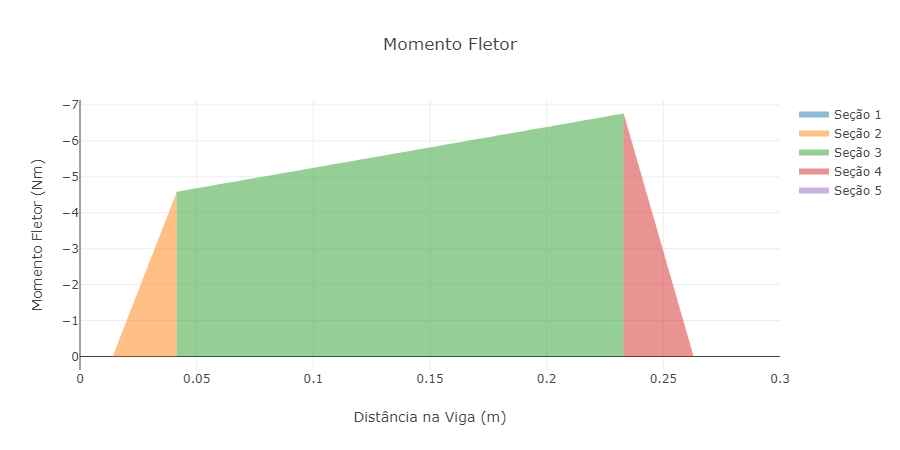

In [3279]:
Image('Momento_Fletor_XY.png')

In [3280]:
V_xy = 225.32 # N
M_xy = -6.7596 # Nm

O Ponto Crítico, de acordo com o que foi visto nos gráficos, é em x = 0.233m

Necessário utilizar a resultante de ambos:

In [3281]:
V_res = sqrt(V_xy**2 + V_xz**2)
M_res = sqrt(M_xy**2 + M_xz**2)
display(Math('V_{res} = %s \ N'%round(V_res,2)))
display(Math('M_{res} = %s \ Nm'%round(M_res,2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---

$$\text{Seleção de Material:}$$

Aço 4340 Temperado e Revenido à 650°C

In [3282]:
Sy = 855*10**6  # Pa, 124 kpsi
Sut = 965*10**6 # Pa, 140 kpsi
Sys = Sy*0.5   # MPa

---

$$\text{Dimensionamento Estático}$$

Obteve-se o diâmetro mínimo considerando o cisalhamento e fator de segurança 3. Nota-se que pelo valor ser muito baixo, não será um fator preocupante.

In [3283]:
FS = 3
display(Math(f'd = {(sqrt((16*V_res*FS) / (3*pi*Sys)))*1000:.2f} \ mm'))

<IPython.core.display.Math object>

Obtendo as tensões e utilizando o critério de Tresca afim de determinar diâmetro:

In [3284]:
d = sy.symbols('d')
σx = (32*M_res) / (pi*d**3)
σy = 0
τxy = (16*T) / (pi*d**3)
display(Math(f'σ_x = {sy.latex(σx)}'))
display(Math('τ_{xy} = %s'%sy.latex(τxy)))
display(Math(f'σ_y = {sy.latex(σy)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3285]:
σadm = Sys / FS
display(Math('σ_{adm} = %s \ MPa'%sy.latex(σadm*10**-6)))

<IPython.core.display.Math object>

In [3286]:
EQ = sy.Eq(σadm, sy.sqrt(((σx - σy)/2)**2 + τxy**2))
EQ

Eq(142500000.0, 135.804003500059*sqrt(d**(-6)))

In [3287]:
d_min = sy.solve(EQ, d)[1]
display(Math('d_{min} = %s \\ mm'%sy.latex(round(d_min*10**3,2))))

<IPython.core.display.Math object>

O critério de Tresca é mais conservativo que o de Von Mises, por considerar como falha metade do limite de escoamento.

---

$$\text{Catálogo de Engrenagem}$$

Conforme Catálogo Geral de Engrenagens para Correntes de Transmissão presente em anexo, para um pinhão com as características dadas:   
 - N° de dentes: 17
 - Norma: ASA
 - Passo: 9,525 mm  = 3/8"
 - Diâmetro Primitivo: 51,83 mm
 - A (comprimento): 28 mm   

O mínimo diâmetro do furo é 12mm e máximo furo recomendável é 27mm, logo escolheu-se o de 12, 15 e 20mm para dimensionar à fadiga

In [3288]:
d = array([12 * 10 ** -3, 15 * 10 ** -3, 20 * 10 ** -3]) # m
for i in range(0, len(d)):
    display(Math(f'd_{i} = {d[i]*1000} \ mm'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---

$$\text{Dimensionamento à Fadiga}$$

Foi necessário determinar o Limite de Endurança ($S_e$).   
$S_e = k_a k_b k_c k_d k_e S_e'$

In [3289]:
Se_ = 0.5*Sut
display(Math(f"S_e' = {Se_*10**-6} MPa"))

<IPython.core.display.Math object>

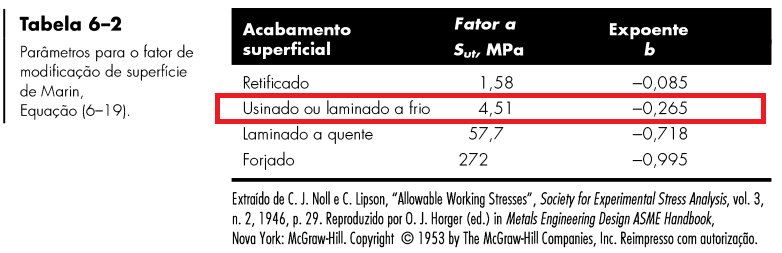

In [3290]:
Image('ka.png')

In [3291]:
a = 4.51
b = -0.265
ka = a*(Sut*10**-6)**b
display(Math(f'k_a = {ka:.2f}'))

<IPython.core.display.Math object>

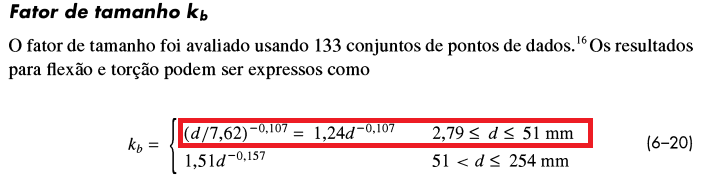

In [3292]:
Image('kb.png')

In [3293]:
kb = 1.24*(d*10**3)**-0.107
for i in range(0, len(kb)):
    display(Math(f'k_b = {sy.latex(kb[i])}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3294]:
kc = 1 # Flexão
kd = 1 # Temperatura

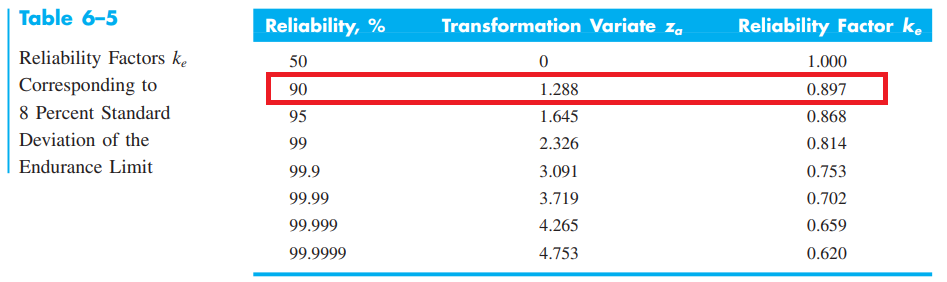

In [3295]:
ke = 0.897
Image('ke.png')

In [3296]:
Se = ka*kb*kc*kd*ke*Se_
for i in range(0, len(Se)):
    display(Math(f"S_e = {sy.latex(Se[i]*10**-6)} MPa"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

O critério de Soderberg é extremamente conservativo e se resguarda contra o escoamento. Foi o critério escolhido.

In [3297]:
n, μ, Se_symbol, kf, Ma, kfs, Ta, Sy_symbol, Mm, Tm, d_soderberg = sy.symbols('n, μ, Se, kf, Ma, kfs, Ta, Sy, Mm, Tm, d')
DE_Soderberg = sy.Eq(1/n,
                     (16/(sy.pi*d_soderberg**3)) 
                     *
                     ((1/Se_symbol)*((4*(kf*Ma)**2 + 3*(kfs*Ta)**2)**(1/2))
                     +
                     (1/Sy_symbol)*((4*(kf*Mm)**2 + 3*(kfs*Tm)**2)**(1/2)))
                     )
DE_Soderberg

Eq(1/n, 16*((4*Mm**2*kf**2 + 3*Tm**2*kfs**2)**0.5/Sy + (4*Ma**2*kf**2 + 3*Ta**2*kfs**2)**0.5/Se)/(pi*d**3))

Em que:
 - n: fator de segurança
 - $K_f$: fator de concetração de tensão de fadiga para flexão
 - $K_{fs}$: fator de concetração de tensão de fadiga para torção
 - $M_a$: momento flexor alternante
 - $M_m$: momento flexor médio
 - $T_m$: torque médio
 - $T_a$: torque alternante
 - $S_e$: limite de endurância
 - $S_{y}$: limite de escoamento

Considerou-se um eixo simples, de diâmetro constante, sem rebaixos. Logo kf e kfs iguais a 1:

In [3298]:
DE_Soderberg = DE_Soderberg.subs({kf:1, kfs:1})
DE_Soderberg

Eq(1/n, 16*((4*Mm**2 + 3*Tm**2)**0.5/Sy + (4*Ma**2 + 3*Ta**2)**0.5/Se)/(pi*d**3))

Além disso:
 - $M_m = T_a = 0$
 - $M_a = M_{max} = M_{res}$
 - $T_m = T$

In [3299]:
DE_Soderberg = DE_Soderberg.subs({Ta:0, Mm:0, Tm:T, Ma: M_res, Sy_symbol:Sy})
DE_Soderberg

Eq(1/n, 16*(3.62616484859449e-8 + 39.5279693670191/Se)/(pi*d**3))

In [3300]:
n = sy.solve(DE_Soderberg, n)[0]
display(Math(f'n = {sy.latex(n)}'))

<IPython.core.display.Math object>

Os fatores de segurança em fadiga para cada diâmetro analisado são:

In [3301]:
for i in range(0, len(d)):
    ni = n.subs({d_soderberg:d[i], Se_symbol:Se[i]})
    display(Math(f'n = {ni}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>